### `Import the main Libraries & Frameworks`

In [1]:
## main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, shutil
from pathlib import Path
pd.set_option('display.max_colwidth', None)

## Metrics
from sklearn.metrics import log_loss

## Preprocessing
from sklearn.model_selection import StratifiedShuffleSplit

## tensorflow
import tensorflow as tf

### `Read the Dataset and Look at the big picture`

In [2]:
## Reading the CSV Files
files_path = os.path.join(os.getcwd(), 'zendi')  ## path of of floder

## Reading both Train.csv and Test.csv
df_train_labels = pd.read_csv(os.path.join(files_path, 'Train.csv'))
df_test_labels = pd.read_csv(os.path.join(files_path, 'Test.csv'))

In [3]:
## Images Folders
total_images_dir = Path(os.path.join(files_path, 'Images'))
print('Total Number of Images is --- ', len(os.listdir(total_images_dir)))

## Number of Labels
print('Total Number of the Labels is ---', len(df_train_labels) + len(df_test_labels)) ## Half of Images Number

Total Number of Images is ---  15260
Total Number of the Labels is --- 7630


In [4]:
## Get the Images Path with respect to each images id
df_images_paths = pd.DataFrame({'Image_path':list(total_images_dir.glob(r'*.jpg')), 'Image_id':os.listdir(total_images_dir)})
df_images_paths.head()

,Image_path,Image_id
0,C:\Users\moham\Desktop\zendi\Images\._id_004wknd7qd.jpg,._id_004wknd7qd.jpg
1,C:\Users\moham\Desktop\zendi\Images\._id_004wknd7qd_rgn.jpg,._id_004wknd7qd_rgn.jpg
2,C:\Users\moham\Desktop\zendi\Images\._id_005sitfgr2.jpg,._id_005sitfgr2.jpg
3,C:\Users\moham\Desktop\zendi\Images\._id_005sitfgr2_rgn.jpg,._id_005sitfgr2_rgn.jpg
4,C:\Users\moham\Desktop\zendi\Images\._id_00stp9t6m6.jpg,._id_00stp9t6m6.jpg


In [5]:
## Split the Images Folder (only for train now)

## For Train, and add the Label according to images id
train_images = df_images_paths[df_images_paths['Image_id'].isin(df_train_labels['Image_id'])]
train_images = train_images.merge(right=df_train_labels, on='Image_id', how='inner')
train_images = train_images.drop(columns='Image_id', axis=1)  ## drop this column, it doesn't matter now

## check
print('Total Number of Training Images (taking only the not duplicated) --- ', len(train_images))

Total Number of Training Images (taking only the not duplicated) ---  5340


### `Exploratory Data Analyis`

In [6]:
## It seems that is Multiclassification task
print('Classed found in this Dataset --- ', df_train_labels['Label'].unique())

Classed found in this Dataset ---  ['blast' 'brown' 'healthy']


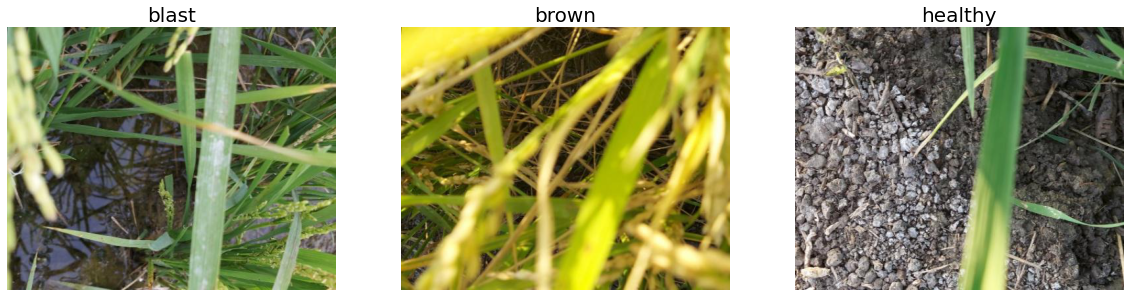

In [7]:
## We want to get an instance for each unique target and plot it
target_values = train_images['Label'].unique()
img_key_value = {}    ## to append in it
for key in target_values:
    img_key_value[key] = train_images[train_images['Label']==key].iloc[0][0]
    
## Reading the images, then plot them
blast_img = plt.imread(img_key_value['blast'])
brown_img = plt.imread(img_key_value['brown'])
healthy_img = plt.imread(img_key_value['healthy'])

## In one Figure
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
plt.sca(ax[0])
plt.imshow(blast_img)
plt.title('blast', fontsize=20)
plt.axis('off')
plt.sca(ax[1])
plt.imshow(brown_img)
plt.title('brown', fontsize=20)
plt.axis('off')
plt.sca(ax[2])
plt.imshow(healthy_img)
plt.title('healthy', fontsize=20)
plt.axis('off')
plt.show()

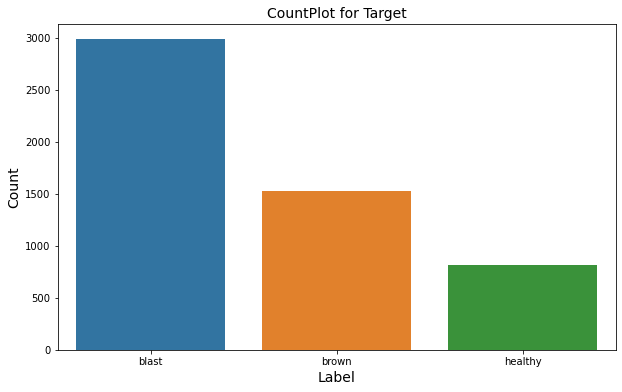

In [8]:
## Check the balance of the target  
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=train_images)
plt.title('CountPlot for Target', fontsize=14)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()    ## imblanced dataset

In [9]:
## Check the shapes of these Images
shapes = []
for i in range(len(train_images)):
    e = plt.imread(train_images['Image_path'][i])
    shapes.append(e.shape)

In [10]:
## Make this array 
shapes = np.array(shapes)
## Check the maximum and minimum shape of each dimensions in the training images
first_dim = [shapes[:, 0].max(), shapes[:, 0].min()]
second_dim = [shapes[:, 1].max(), shapes[:, 1].min()]
third_dim = [shapes[:, 2].max(), shapes[:, 2].min()]

print('Range of first dim -- ', first_dim)
print('Range of second dim -- ', second_dim)
print('Range of third dim -- ', third_dim)           ### Crop these Images to shape (400, 500, 3)

Range of first dim --  [1500, 400]
Range of second dim --  [2000, 500]
Range of third dim --  [3, 3]


### `Split the Training Dataset to (train & valid)`
`Using the startiefied method as the dataste is imblanced`

Number of Train Images ---  (4272, 2)
Number of Validation Images ---  (1068, 2)


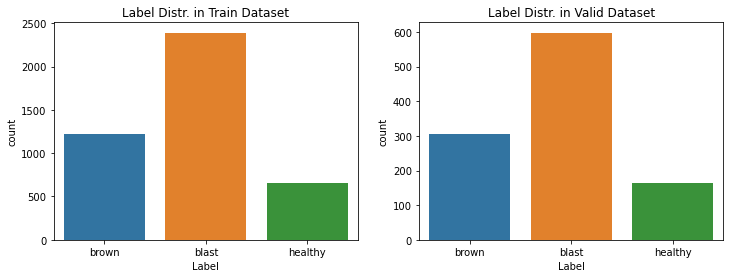

In [11]:
#### i will split the data on the Gender column

## create the generator
split_data = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
gen_for_indecies = split_data.split(train_images, train_images['Label'])

for train_idx, test_idx in gen_for_indecies:
    train_images_final = train_images.iloc[train_idx]
    valid_images_final = train_images.iloc[test_idx]


## Check shapes
print('Number of Train Images --- ', train_images_final.shape)
print('Number of Validation Images --- ', valid_images_final.shape) 


## let's check our results with visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax[0])
sns.countplot(x='Label', data=train_images_final)
plt.title('Label Distr. in Train Dataset')

plt.sca(ax[1])
sns.countplot(x='Label', data=valid_images_final)
plt.title('Label Distr. in Valid Dataset');    ### mission complete , the same exactly what i want

### `Data Preprocessing`

In [12]:
## Copy 
train_df = train_images_final.copy(deep=True)
valid_df = valid_images_final.copy(deep=True)

In [14]:
## To avoid an error was appearing
train_df['Image_path'] = train_df['Image_path'].astype(str)
valid_df['Image_path'] = valid_df['Image_path'].astype(str)

## Create the Generators

## All images will be rescaled by 1./255
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

## Flow from DataFrame (not flow from directory) using the above Generators
train_data = train_datagen.flow_from_dataframe(dataframe=train_df, 
                                               x_col='Image_path', y_col='Label',
                                               target_size=(400, 500), class_mode='sparse',
                                               color_mode='rgb', batch_size=32, 
                                               shuffle=True, seed=123)

valid_data = valid_datagen.flow_from_dataframe(dataframe=valid_df, 
                                               x_col='Image_path', y_col='Label',
                                               target_size=(400, 500), class_mode='sparse',
                                               color_mode='rgb', batch_size=32, 
                                               shuffle=True, seed=123)

Found 4272 validated image filenames belonging to 3 classes.
Found 1068 validated image filenames belonging to 3 classes.


### `Model Training`

In [15]:
## Intialize a Model ---> Need to be Tuned
model = tf.keras.models.Sequential([
    ## conv base
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 500, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    ## top classifier
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


## Prepare the Hyperparameters
## complile the Model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4))  ## we don't need a metric

early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_data, validation_data=(valid_data), 
                    steps_per_epoch=134, validation_steps=34, 
                    epochs=2,                                  ## Tring only 2 epochs ---> try increase 
                    batch_size=32, callbacks=[early_stopp])   

Epoch 1/2
134/134 [==============================] - 152s 1s/step - loss: 0.9991 - val_loss: 0.9255
Epoch 2/2
134/134 [==============================] - 128s 950ms/step - loss: 0.8703 - val_loss: 0.8683


### `Prediction & Inference on Test Dataset`

In [16]:
## note and take care
print('The mapping done in the Model is for training ----', train_data.class_indices)
print('The mapping done in the Model is for validating ----', valid_data.class_indices)  ## Nice

The mapping done in the Model is for training ---- {'blast': 0, 'brown': 1, 'healthy': 2}
The mapping done in the Model is for validating ---- {'blast': 0, 'brown': 1, 'healthy': 2}


In [17]:
## Prediction  --> here I get the probabilties (cross entropy needs the probabilties) -- take care of that point
y_pred_train = model.predict(train_data)
y_pred_valid = model.predict(valid_data)


## Encoding the target with the class indecies
y_true_train = train_df['Label'].map(train_data.class_indices)
y_true_valid = valid_df['Label'].map(train_data.class_indices)


## Getting the loss (log_loss== CrossEntropy) for both train and valid
loss_train = log_loss(y_true_train, y_pred_train)
loss_valid = log_loss(y_true_valid, y_pred_valid)

print(f'Log Loss of Train is -- {loss_train:.7f}')
print(f'Log Loss of Valid is -- {loss_valid:.7f}')

Log Loss of Train is -- 1.1095867
Log Loss of Valid is -- 1.0838927


In [18]:
## check for directory, make new directory (test_dir)
## We want to move the test dataset to this folder
if not os.path.isdir(os.path.join(files_path, 'test_dir')):
    os.makedirs(os.path.join(files_path, 'test_dir'))
    
test_dir_path = os.path.join(files_path, 'test_dir')

## Move test Files
imgs_test = df_test_labels.values
for img in imgs_test:
    src = os.path.join(files_path, 'Images', img.tolist()[0])   ## source
    dst = os.path.join(test_dir_path, img.tolist()[0])          ## destination
    shutil.copyfile(src, dst)    ## data is ready

In [19]:
print('Number of Images After moving test dataset from the main folder ---', 
      len(os.listdir(os.path.join(files_path, 'Images'))))
print('Number of Images of test dataset in the new folder ---', 
      len(os.listdir(test_dir_path)))      ## Nice

Number of Images After moving test dataset from the main folder --- 15260
Number of Images of test dataset in the new folder --- 2290


#### `I made a great trick here to avoid load the test dataset in the RAM`

In [20]:
## Paths of Images in test_dir
test_df = pd.DataFrame({'Image_path':list(Path(os.path.join(test_dir_path)).glob(r'*.jpg')), 
                        'Image_id':os.listdir(test_dir_path)})

test_df['Dummy_Label'] = 'Null'  ## anything to make (flow_from_dataframe) works

## To avoid an error appearing
test_df['Image_path'] = test_df['Image_path'].astype(str)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                             x_col='Image_path', y_col='Dummy_Label',
                                             target_size=(400, 500), class_mode='sparse',
                                             color_mode='rgb', batch_size=1, 
                                             shuffle=False, seed=42)

Found 2290 validated image filenames belonging to 1 classes.


In [21]:
## Finally on test -- probabilties for each class
y_pred_proba_test = model.predict(test_data)

In [22]:
## Final dataframe to be submited
df_submit = pd.DataFrame(y_pred_proba_test, columns=['balst', 'brown', 'healty'])
df_submit['Image_id'] = test_df['Image_id']

df_submit

,balst,brown,healty,Image_id
0,0.658190,0.227270,0.114539,id_00vl5wvxq3.jpg
1,0.321032,0.540735,0.138233,id_00vl5wvxq3_rgn.jpg
2,0.561570,0.263823,0.174607,id_01hu05mtch.jpg
3,0.627949,0.274482,0.097569,id_01hu05mtch_rgn.jpg
4,0.211356,0.368178,0.420466,id_030ln10ewn.jpg
...,...,...,...,...
2285,0.461257,0.321191,0.217552,id_ztvp2l9k3h_rgn.jpg
2286,0.459545,0.353876,0.186579,id_zwwcma7hlt.jpg
2287,0.810278,0.130249,0.059473,id_zwwcma7hlt_rgn.jpg
2288,0.529779,0.293193,0.177028,id_zyo7m4fj8h.jpg


### `Done by Mohammed Agoor`
`6/5/2022`